# 1. 데이터 탐색적 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import warnings
# 경고메세지 끄기
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
#한글 폰트 세팅
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
import numpy as np
from tqdm import tqdm

## (1) 데이터 둘러보기

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
age_gender = pd.read_csv('age_gender_info.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [4]:
test.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0


In [5]:
train.shape, test.shape

((2952, 15), (1022, 14))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [7]:
# 임대보증금과 임대료는 '-'을 null로 바꾼 후 float로 타입 변경
# train
train.loc[train.임대보증금=='-', '임대보증금'] = np.nan
train['임대보증금'] = train['임대보증금'].astype(float)

train.loc[train.임대료=='-', '임대료'] = np.nan
train['임대료'] = train['임대료'].astype(float)
#test
test.loc[test.임대보증금=='-', '임대보증금'] = np.nan
test['임대보증금'] = test['임대보증금'].astype(float)

test.loc[test.임대료=='-', '임대료'] = np.nan
test['임대료'] = test['임대료'].astype(float)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2371 non-null   float64
 10  임대료                           2362 non-null   float64
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          1022 non-null   object 
 1   총세대수                          1022 non-null   int64  
 2   임대건물구분                        1022 non-null   object 
 3   지역                            1022 non-null   object 
 4   공급유형                          1022 non-null   object 
 5   전용면적                          1022 non-null   float64
 6   전용면적별세대수                      1022 non-null   int64  
 7   공가수                           1022 non-null   float64
 8   자격유형                          1020 non-null   object 
 9   임대보증금                         836 non-null    float64
 10  임대료                           836 non-null    float64
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  980 non-null    float64
 12  도보 10분거리 내 버스정류장 수            1022 non-null   float64
 13  단지내

- null값 : 임대보증금, 임대료, 지하철, 버스정류장

## (2)피처 요약표

In [10]:
# def resumetable(df):
#     print(f'데이터셋 형상: {df.shape}')
#     summary=pd.DataFrame(df.dtypes, columns={'데이터 타입'})
#     summary=summary.reset_index()
#     summary=summary.rename(columns={'index': '피처'})
    
#     summary['결측값 개수']=df.isnull().sum().values
#     summary['고윳값 개수']=df.nunique().values
#     summary['첫 번째 값']=df.loc[0].values 
#     summary['두 번째 값']=df.loc[1].values 
#     summary['세 번째 값']=df.loc[2].values 
    
#     return summary

# resumetable(train)

## (3) 타깃값 분포

<AxesSubplot:xlabel='등록차량수', ylabel='Count'>

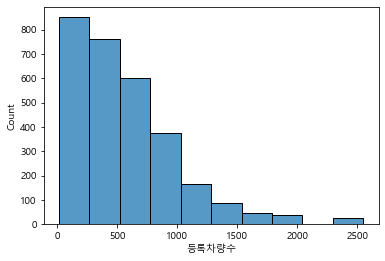

In [11]:
sns.histplot(data=train, x='등록차량수', bins=10)

-> 성능 개선을 위해 나중에 로그변환할거임

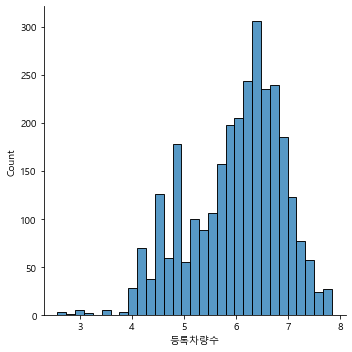

In [12]:
#로그 변환시 그래프
sns.displot(np.log(train['등록차량수']))

## (4) 전용면적 5의 배수로 변경 후 상/하한 적용

In [13]:
train['전용면적'] = train['전용면적']//5*5
test['전용면적'] = test['전용면적']//5*5

In [14]:
#상한100, 하한 15
idx = train[train['전용면적']>100].index
train.loc[idx, '전용면적'] = 100
idx = test[test['전용면적']>100].index
test.loc[idx, '전용면적'] = 100

idx = train[train['전용면적']<15].index
train.loc[idx, '전용면적'] = 15
idx = test[test['전용면적']<15].index
test.loc[idx, '전용면적'] = 15

In [15]:
test['전용면적'].unique()

array([ 35.,  45.,  50.,  30.,  55.,  25.,  75., 100.,  15.,  20.,  40.,
        60.,  80.,  70.])

## (5) 단지별 데이터 1차원으로 취합

In [16]:
columns = test.columns
target = '등록차량수'
area_columns = []
for area in train['전용면적'].unique():
    area_columns.append(f'면적_{area}')

In [17]:
train2 = pd.DataFrame()
test2 = pd.DataFrame()

In [18]:
for i, code in tqdm(enumerate(train['단지코드'].unique())):
    temp = train[train['단지코드']==code]
    temp.index = range(temp.shape[0])
    for col in columns:
        train2.loc[i, col] = temp.loc[0, col]
    
    for col in area_columns:
        area = float(col.split('_')[-1])
        train2.loc[i, col] = temp[temp['전용면적']==area]['전용면적별세대수'].sum()
    
    train2.loc[i, '등록차량수'] = temp.loc[0, '등록차량수']
    
for i, code in tqdm(enumerate(test['단지코드'].unique())):
    temp = test[test['단지코드']==code]
    temp.index = range(temp.shape[0])
    for col in columns:
        test2.loc[i, col] = temp.loc[0, col]
    
    for col in area_columns:
        area = float(col.split('_')[-1])
        test2.loc[i, col] = temp[temp['전용면적']==area]['전용면적별세대수'].sum()

423it [00:26, 16.07it/s]
150it [00:09, 15.74it/s]


In [19]:
train2

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,면적_25.0,면적_70.0,면적_15.0,면적_20.0,면적_100.0,면적_60.0,면적_75.0,면적_80.0,면적_65.0,등록차량수
0,C2483,900.0,아파트,경상북도,국민임대,35.0,134.0,38.0,A,15667000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1015.0
1,C2515,545.0,아파트,경상남도,국민임대,30.0,276.0,17.0,A,9216000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0
2,C1407,1216.0,아파트,대전광역시,국민임대,30.0,288.0,13.0,A,15620000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1064.0
3,C1945,755.0,아파트,경기도,국민임대,35.0,120.0,6.0,B,15607000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,730.0
4,C1470,696.0,아파트,전라북도,국민임대,35.0,228.0,14.0,A,12015000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,553.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,C2586,90.0,아파트,제주특별자치도,행복주택,15.0,12.0,7.0,J,16800000.0,...,42.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0
419,C2035,492.0,아파트,강원도,국민임대,25.0,132.0,24.0,A,10000000.0,...,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,246.0
420,C2020,40.0,아파트,부산광역시,행복주택,15.0,20.0,7.0,L,18000000.0,...,5.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0
421,C2437,90.0,아파트,충청북도,영구임대,20.0,90.0,12.0,C,10346000.0,...,0.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,16.0


In [20]:
train2.shape, test2.shape 

((423, 30), (150, 29))

## (6) 데이터 합치기

In [21]:
df = pd.concat([train2, test2])
df.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              1
임대보증금                             5
임대료                               7
도보 10분거리 내 지하철역 수(환승노선 수 반영)     25
도보 10분거리 내 버스정류장 수                1
단지내주차면수                           0
면적_35.0                           0
면적_50.0                           0
면적_55.0                           0
면적_30.0                           0
면적_45.0                           0
면적_40.0                           0
면적_25.0                           0
면적_70.0                           0
면적_15.0                           0
면적_20.0                           0
면적_100.0                          0
면적_60.0                           0
면적_75.0                           0
면적_80.0                     

In [22]:
df.shape

(573, 30)

In [23]:
train2.isnull().sum()

단지코드                             0
총세대수                             0
임대건물구분                           0
지역                               0
공급유형                             0
전용면적                             0
전용면적별세대수                         0
공가수                              0
자격유형                             0
임대보증금                            4
임대료                              6
도보 10분거리 내 지하철역 수(환승노선 수 반영)    20
도보 10분거리 내 버스정류장 수               1
단지내주차면수                          0
면적_35.0                          0
면적_50.0                          0
면적_55.0                          0
면적_30.0                          0
면적_45.0                          0
면적_40.0                          0
면적_25.0                          0
면적_70.0                          0
면적_15.0                          0
면적_20.0                          0
면적_100.0                         0
면적_60.0                          0
면적_75.0                          0
면적_80.0                          0
면적_65.0             

In [24]:
test.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           186
임대료                             186
도보 10분거리 내 지하철역 수(환승노선 수 반영)     42
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
dtype: int64

train 결측: 임대료, 임대보증금, 지하철역, 버스정류장  
test 결측: 자격유형, 임대료, 임대보증금, 지하철역

## (7) EAD

### 1. 자격유형
- 행 하나밖에 없으므로 자격유형 중 많은 값으로 채움 -> 'A'로 채움

In [25]:
df[df['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,면적_25.0,면적_70.0,면적_15.0,면적_20.0,면적_100.0,면적_60.0,면적_75.0,면적_80.0,면적_65.0,등록차량수
26,C2253,1161.0,아파트,강원도,영구임대,25.0,745.0,0.0,NaN,2249000.0,...,759.0,0.0,1.0,7.0,1.0,0.0,0.0,1.0,0.0,NaN


In [26]:
df[df['단지코드']=='C2253']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,면적_25.0,면적_70.0,면적_15.0,면적_20.0,면적_100.0,면적_60.0,면적_75.0,면적_80.0,면적_65.0,등록차량수
26,C2253,1161.0,아파트,강원도,영구임대,25.0,745.0,0.0,NaN,2249000.0,...,759.0,0.0,1.0,7.0,1.0,0.0,0.0,1.0,0.0,NaN


In [27]:
df['자격유형'].value_counts(dropna=False)

A      434
H       43
C       38
J       27
K        7
E        5
L        5
B        3
G        3
N        3
M        2
F        1
D        1
NaN      1
Name: 자격유형, dtype: int64

In [28]:
# 자격유형 중 가장 많은 값인 A로 채움
df.loc[df['자격유형'].isnull(), '자격유형'] ='A'

### 2. 임대보증금, 임대료
-> 평균으로 대체

In [29]:
df[df['임대보증금'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,면적_25.0,면적_70.0,면적_15.0,면적_20.0,면적_100.0,면적_60.0,면적_75.0,면적_80.0,면적_65.0,등록차량수
321,C1350,1401.0,아파트,대전광역시,공공분양,70.0,317.0,2.0,D,NaN,...,0.0,476.0,0.0,0.0,0.0,0.0,0.0,235.0,0.0,2315.0
358,C1326,1934.0,아파트,부산광역시,국민임대,20.0,472.0,43.0,H,NaN,...,590.0,0.0,0.0,576.0,0.0,0.0,0.0,0.0,0.0,1153.0
377,C1786,480.0,아파트,강원도,행복주택,15.0,156.0,25.0,K,NaN,...,232.0,0.0,156.0,0.0,0.0,0.0,0.0,0.0,0.0,345.0
415,C2186,924.0,아파트,대구광역시,국민임대,25.0,238.0,0.0,H,NaN,...,508.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,744.0
147,C2152,120.0,아파트,강원도,영구임대,20.0,66.0,9.0,C,NaN,...,0.0,0.0,0.0,66.0,0.0,0.0,0.0,0.0,0.0,NaN


In [30]:
df[df['임대료'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,면적_25.0,면적_70.0,면적_15.0,면적_20.0,면적_100.0,면적_60.0,면적_75.0,면적_80.0,면적_65.0,등록차량수
274,C1397,370.0,아파트,서울특별시,장기전세,20.0,51.0,9.0,A,87444000.0,...,0.0,0.0,0.0,51.0,0.0,0.0,0.0,0.0,0.0,1595.0
282,C1039,790.0,아파트,서울특별시,장기전세,50.0,126.0,13.0,A,187694000.0,...,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,645.0
321,C1350,1401.0,아파트,대전광역시,공공분양,70.0,317.0,2.0,D,NaN,...,0.0,476.0,0.0,0.0,0.0,0.0,0.0,235.0,0.0,2315.0
358,C1326,1934.0,아파트,부산광역시,국민임대,20.0,472.0,43.0,H,NaN,...,590.0,0.0,0.0,576.0,0.0,0.0,0.0,0.0,0.0,1153.0
377,C1786,480.0,아파트,강원도,행복주택,15.0,156.0,25.0,K,NaN,...,232.0,0.0,156.0,0.0,0.0,0.0,0.0,0.0,0.0,345.0
415,C2186,924.0,아파트,대구광역시,국민임대,25.0,238.0,0.0,H,NaN,...,508.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,744.0
147,C2152,120.0,아파트,강원도,영구임대,20.0,66.0,9.0,C,NaN,...,0.0,0.0,0.0,66.0,0.0,0.0,0.0,0.0,0.0,NaN


<AxesSubplot:xlabel='자격유형', ylabel='임대료'>

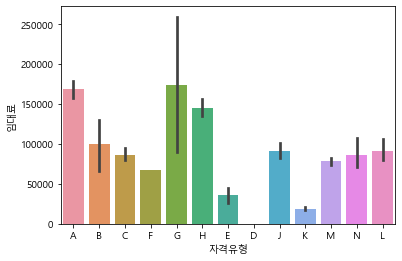

In [31]:
sns.barplot(x='자격유형', y='임대료', data=df) 

<AxesSubplot:xlabel='자격유형', ylabel='임대보증금'>

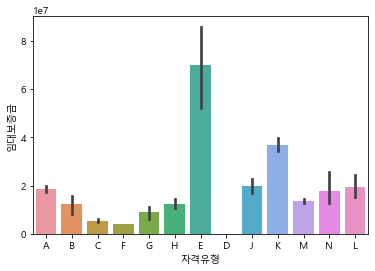

In [32]:
sns.barplot(x='자격유형', y='임대보증금', data=df)

In [33]:
#임대료 - train데이터의 평균으로 채우기
df.loc[df['임대료'].isnull(), '임대료'] = train2['임대료'].mean()

In [34]:
#임대보증금 - train데이터의 평균으로 채우기
df.loc[df['임대보증금'].isnull(), '임대보증금'] = train2['임대보증금'].mean()

### 4. 버스
- 젤 많은 값인 2로 채움

In [35]:
df[df['도보 10분거리 내 버스정류장 수'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,면적_25.0,면적_70.0,면적_15.0,면적_20.0,면적_100.0,면적_60.0,면적_75.0,면적_80.0,면적_65.0,등록차량수
318,C1649,575.0,아파트,경상남도,공공임대(10년),70.0,80.0,15.0,A,46000000.0,...,0.0,80.0,0.0,0.0,0.0,0.0,0.0,495.0,0.0,855.0


In [36]:
train2['도보 10분거리 내 버스정류장 수'].value_counts(dropna=False)

2.0     113
3.0     104
4.0      64
1.0      45
5.0      27
6.0      25
8.0      13
7.0      10
10.0      8
12.0      4
20.0      3
16.0      1
NaN       1
15.0      1
14.0      1
11.0      1
0.0       1
19.0      1
Name: 도보 10분거리 내 버스정류장 수, dtype: int64

In [37]:
# 제일 많은 값인 2로 채움
df['도보 10분거리 내 버스정류장 수'] = df['도보 10분거리 내 버스정류장 수'].fillna(2)

### 5. 지하철
- 제일 많은 값이 0으로 채움

In [38]:
df[df['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,면적_25.0,면적_70.0,면적_15.0,면적_20.0,면적_100.0,면적_60.0,면적_75.0,면적_80.0,면적_65.0,등록차량수
15,C1312,518.0,아파트,충청남도,국민임대,35.0,60.0,12.0,A,1.746000e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,359.0
16,C1874,619.0,아파트,충청남도,영구임대,25.0,294.0,2.0,C,3.141000e+06,...,455.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,62.0
20,C1424,625.0,아파트,대전광역시,공공임대(50년),35.0,268.0,2.0,A,1.424700e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,179.0
21,C2100,880.0,아파트,대전광역시,국민임대,50.0,46.0,4.0,A,2.230700e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,671.0
23,C2520,970.0,아파트,대전광역시,공공임대(50년),35.0,960.0,2.0,A,1.315500e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,386.0
25,C1616,1507.0,아파트,대전광역시,영구임대,25.0,588.0,1.0,C,5.787000e+06,...,588.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,98.0
26,C1704,639.0,아파트,대전광역시,영구임대,35.0,204.0,34.0,C,8.625000e+06,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,131.0
27,C2258,965.0,아파트,대전광역시,영구임대,25.0,588.0,13.0,C,5.787000e+06,...,589.0,0.0,3.0,7.0,1.0,0.0,0.0,0.0,0.0,78.0
36,C1068,806.0,아파트,충청남도,국민임대,35.0,200.0,11.0,A,1.123400e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,510.0
37,C1983,903.0,아파트,충청남도,공공임대(50년),35.0,40.0,3.0,A,1.036300e+07,...,478.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,253.0


In [39]:
train2['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].value_counts(dropna=False)

0.0    359
1.0     38
NaN     20
2.0      5
3.0      1
Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: int64

In [40]:
# 원래는 단지코드에 해당하는 역 수를 채울려고 했는데 없으니까 그냥 역 수 중에서 가장 많은 값인 0으로 채운다.
df['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = df['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0)

결측값 처리 최종!!!

In [41]:
#결측값 처리: 최종
df.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                             0
임대료                               0
도보 10분거리 내 지하철역 수(환승노선 수 반영)      0
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
면적_35.0                           0
면적_50.0                           0
면적_55.0                           0
면적_30.0                           0
면적_45.0                           0
면적_40.0                           0
면적_25.0                           0
면적_70.0                           0
면적_15.0                           0
면적_20.0                           0
면적_100.0                          0
면적_60.0                           0
면적_75.0                           0
면적_80.0                     

# 2. 시각화

In [42]:
#타깃값과의 관계를 시각화하기 위해 new_train 만들기
new_train=df.iloc[:len(train2), :]
new_test=df.iloc[len(train2):, :-1]
new_train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,면적_25.0,면적_70.0,면적_15.0,면적_20.0,면적_100.0,면적_60.0,면적_75.0,면적_80.0,면적_65.0,등록차량수
0,C2483,900.0,아파트,경상북도,국민임대,35.0,134.0,38.0,A,15667000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1015.0
1,C2515,545.0,아파트,경상남도,국민임대,30.0,276.0,17.0,A,9216000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0
2,C1407,1216.0,아파트,대전광역시,국민임대,30.0,288.0,13.0,A,15620000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1064.0
3,C1945,755.0,아파트,경기도,국민임대,35.0,120.0,6.0,B,15607000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,730.0
4,C1470,696.0,아파트,전라북도,국민임대,35.0,228.0,14.0,A,12015000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,553.0


In [43]:
new_train.shape, new_test.shape

((423, 30), (150, 29))

## (1) 범주형 변수
- 공급유형, 단지코드, 임대건물구분, 자격유형, 지역

### 1. 공급유형과 자격유형간의 관계 
-> 매우 높음

In [44]:
pd.crosstab(df['공급유형'], df['자격유형'])

자격유형,A,B,C,D,E,F,G,H,J,K,L,M,N
공급유형,,,,,,,,,,,,,
공공분양,0,0,0,1,0,0,0,0,0,0,0,0,0
공공임대(10년),45,0,0,0,0,0,0,0,0,0,0,0,0
공공임대(50년),14,0,0,0,0,0,0,0,0,0,0,0,0
공공임대(5년),1,0,0,0,0,0,0,0,0,0,0,0,0
국민임대,372,3,0,0,5,0,3,43,0,0,0,0,0
영구임대,1,0,38,0,0,1,0,0,0,0,0,0,0
장기전세,2,0,0,0,0,0,0,0,0,0,0,0,0
행복주택,0,0,0,0,0,0,0,0,27,7,5,2,3


### 2. 단지코드와 타깃값과의 관계
-> 제거 X

<AxesSubplot:xlabel='단지코드', ylabel='등록차량수'>

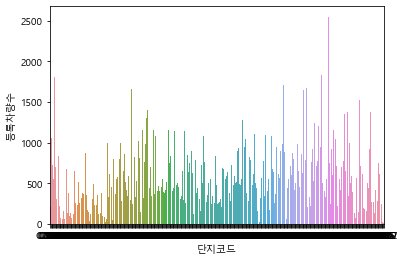

In [45]:
sns.barplot(data=new_train, x='단지코드', y='등록차량수')

### 3. 임대건물구분과 타깃값과의 관계
-> 모두 다 아파트니까 삭제

<AxesSubplot:xlabel='임대건물구분', ylabel='등록차량수'>

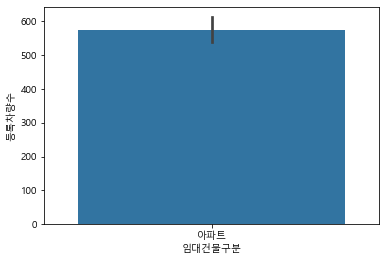

In [46]:
sns.barplot(data=new_train, x='임대건물구분', y='등록차량수')

### 4. 지역과 타깃값과의 관계
-> 제거 X

<AxesSubplot:xlabel='지역', ylabel='등록차량수'>

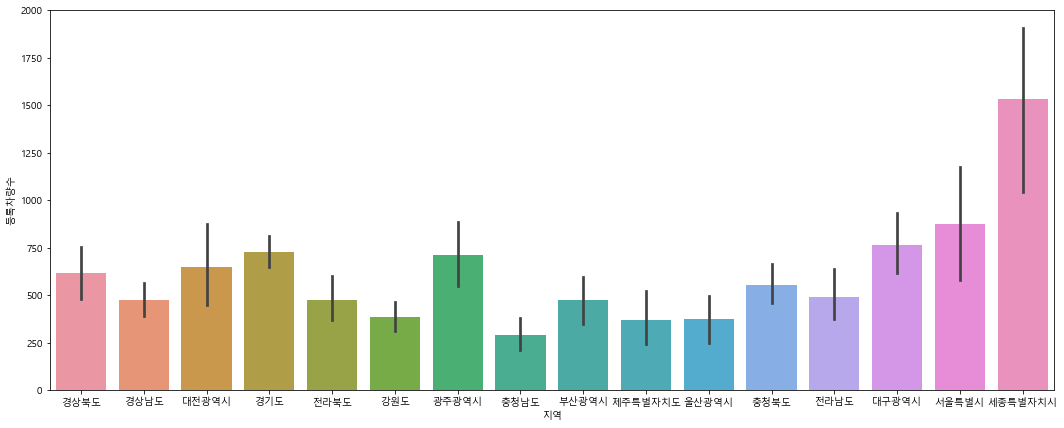

In [47]:
plt.figure(figsize=(18,7))
sns.barplot(data=new_train, x='지역', y='등록차량수')

### 5. 공급유형
-> 공공분양, 장기전세는 임대가 아니므로 없애고, 다른 임대유형들은 따로 컬럼을 만들어줌

In [48]:
# # 원핫 인코딩 이용
# new_train = pd.get_dummies(new_train, columns=['공급유형'])
# new_test = pd.get_dummies(new_test, columns=['공급유형'])

In [49]:
# new_train.drop(['공급유형_공공분양', '공급유형_장기전세', '자격유형'], axis=1, inplace=True)
# new_test.drop(['자격유형'], axis=1, inplace=True) #테스트에는 공공분양, 장기전세 없음

## (2) 수치형 변수
공가수, 단지내주차면수, 버스정류장 수, 지하철역 수, 임대료, 임대보증금, 전용면적, 전용면적별세대수, 총세대수  

### 히트맵
히트맵을 통해서는 단지내주차면수의 값만 가장 유의미하게 타깃값과 관계성이 있음

In [50]:
train_heat = new_train.rename(columns={'도보 10분거리 내 지하철역 수(환승노선 수 반영)':'지하철역 수', '도보 10분거리 내 버스정류장 수': '버스정류장 수'})
train_heat.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철역 수', '버스정류장 수', '단지내주차면수', '면적_35.0',
       '면적_50.0', '면적_55.0', '면적_30.0', '면적_45.0', '면적_40.0', '면적_25.0',
       '면적_70.0', '면적_15.0', '면적_20.0', '면적_100.0', '면적_60.0', '면적_75.0',
       '면적_80.0', '면적_65.0', '등록차량수'],
      dtype='object')

<AxesSubplot:>

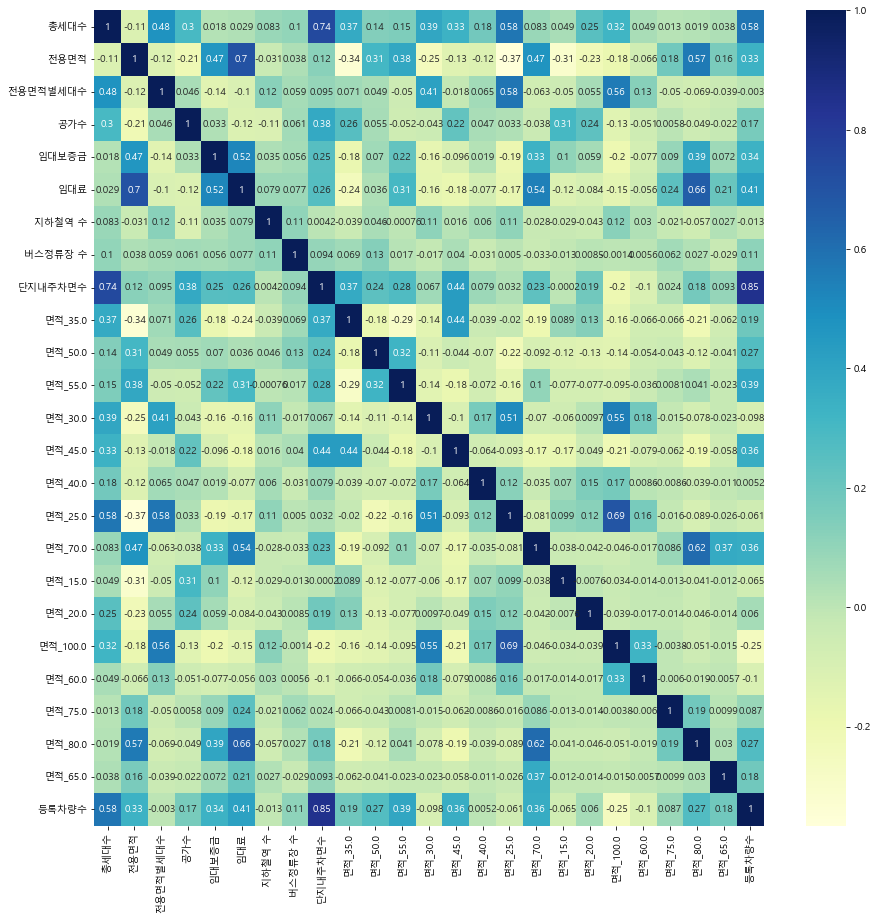

In [51]:
plt.figure(figsize=(15,15))
sns.heatmap(train_heat.corr(),annot= True,cmap="YlGnBu")

### 1. 단지내주차면수
: 제거X

### 2. 공가수
- 공가수: 11인 데이터만 제거 (신뢰구간 너무 넓음)

<AxesSubplot:xlabel='공가수', ylabel='등록차량수'>

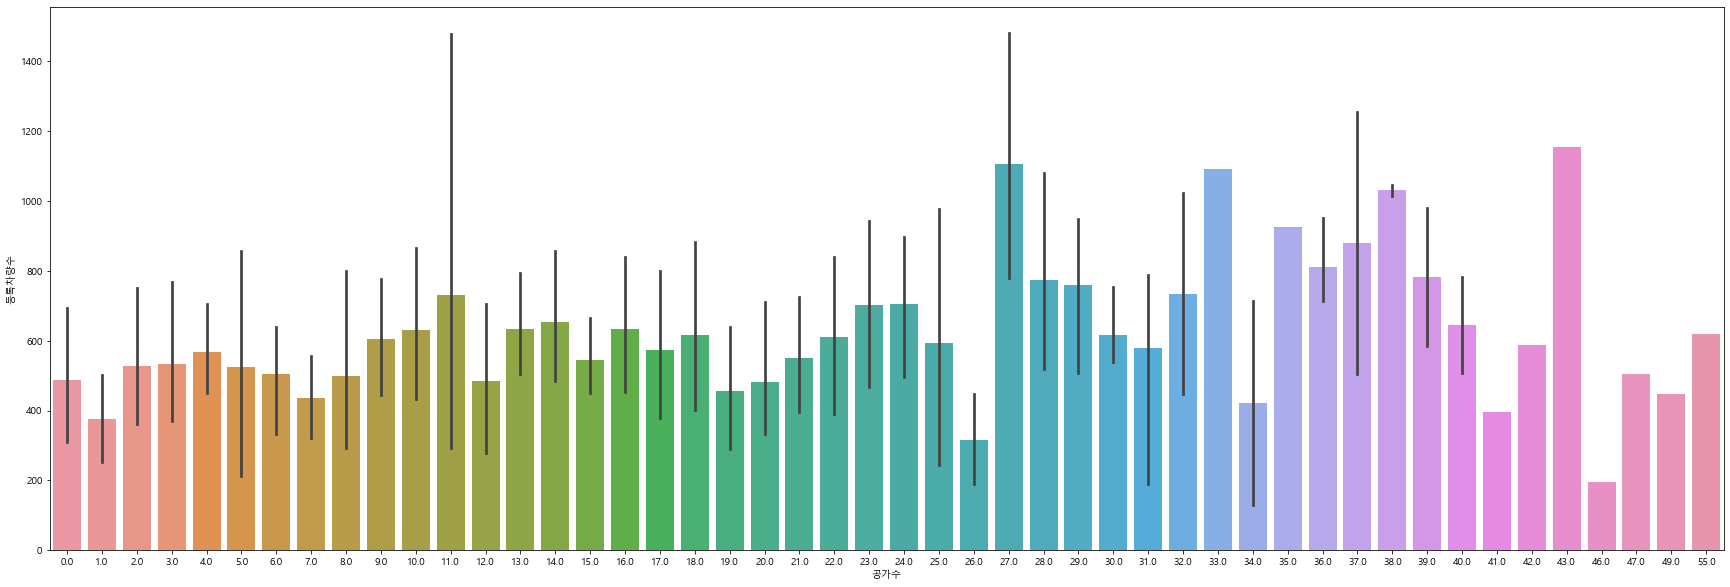

In [52]:
plt.figure(figsize=(30,10))
sns.barplot(data=new_train, x='공가수', y='등록차량수')

In [53]:
# #공가수 11인 데이터 행 제거
# df_idx=df[df.공가수==11.0].index
# df.drop(df_idx, axis=0, inplace=True)

### 3. 버스
도보 10분거리 내 버스정류장 수: 0인 데이터만 제거
주변에 버스정류장이 하나도 없는데 등록차량수의 비율이 가장 낮다는 것은 서로 관계성이 떨어진다고 판단하여 0인 데이터만 제거

<AxesSubplot:xlabel='도보 10분거리 내 버스정류장 수', ylabel='등록차량수'>

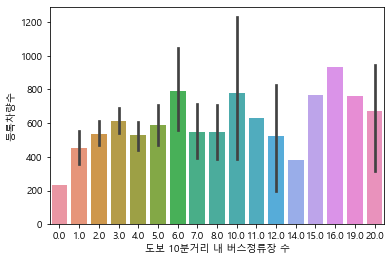

In [54]:
sns.barplot(data=new_train, x='도보 10분거리 내 버스정류장 수', y='등록차량수')

<AxesSubplot:xlabel='도보 10분거리 내 버스정류장 수', ylabel='count'>

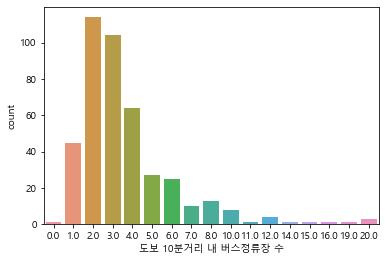

In [55]:
sns.countplot(x=new_train['도보 10분거리 내 버스정류장 수'])

In [56]:
# #버스정류장 수가 0인 데이터 행 제거
# train_idx=new_train[new_train['도보 10분거리 내 버스정류장 수']==0.0].index
# new_train.drop(train_idx, axis=0, inplace=True)

# test_idx=new_test[new_test['도보 10분거리 내 버스정류장 수']==0.0].index
# new_test.drop(test_idx, axis=0, inplace=True)

### 4. 지하철
- 제거 X (연관성 있으니까)

<AxesSubplot:xlabel='도보 10분거리 내 지하철역 수(환승노선 수 반영)', ylabel='등록차량수'>

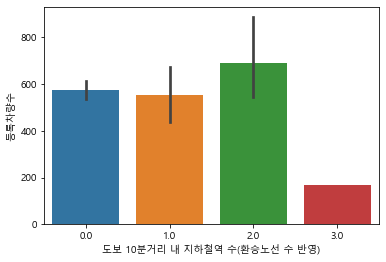

In [57]:
sns.barplot(data=new_train, x='도보 10분거리 내 지하철역 수(환승노선 수 반영)', y='등록차량수')

<AxesSubplot:xlabel='도보 10분거리 내 지하철역 수(환승노선 수 반영)', ylabel='count'>

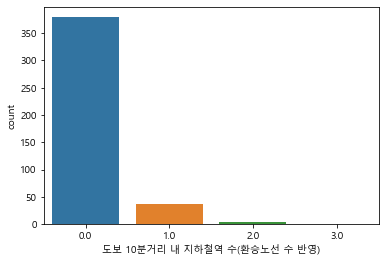

In [58]:
sns.countplot(x=new_train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'])

### 5. 임대료, 임대보증금
제거X  
신뢰구간이 넓기는 하지만 전반적으로 약한 양의 상관관계가 있어 제거하지 않음

<AxesSubplot:xlabel='임대료', ylabel='등록차량수'>

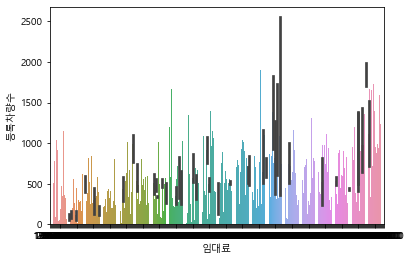

In [59]:
sns.barplot(data=new_train, x='임대료', y='등록차량수')

<AxesSubplot:xlabel='임대보증금', ylabel='등록차량수'>

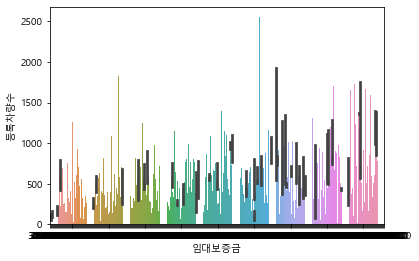

In [60]:
sns.barplot(data=new_train, x='임대보증금', y='등록차량수')

### 6. 전용면적, 전용면적별세대수
- 전용면적: 파생 변수 만들었으므로 삭제
- 전용면적별세대수: 신뢰구간이 너무 넓고 타깃값과의 전반적인 상관관계도 많이 떨어져서 제거

<AxesSubplot:xlabel='전용면적', ylabel='등록차량수'>

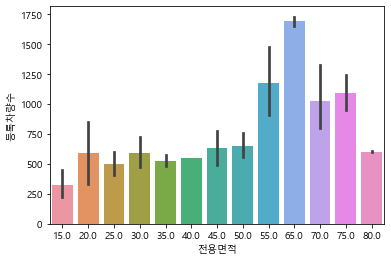

In [61]:
sns.barplot(data=new_train, x='전용면적', y='등록차량수')

<AxesSubplot:xlabel='전용면적별세대수', ylabel='등록차량수'>

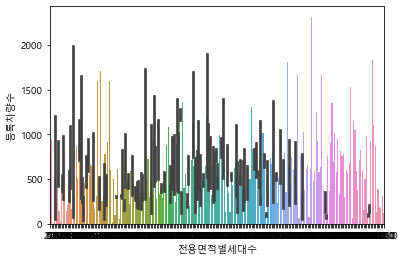

In [62]:
sns.barplot(data=new_train, x='전용면적별세대수', y='등록차량수')

In [63]:
# #의미없는 컬럼 제거
# df.drop(['전용면적', '전용면적별세대수'], axis=1, inplace=True)

### 7. 총세대수
- 제거 X

<AxesSubplot:xlabel='총세대수', ylabel='등록차량수'>

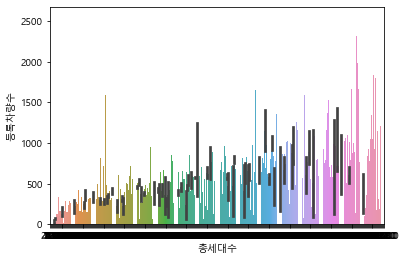

In [64]:
sns.barplot(data=new_train, x='총세대수', y='등록차량수')

### 피처, 이상치 제거

In [65]:
new_train.shape, new_test.shape

((423, 30), (150, 29))

In [66]:
# 1. 공가수: 11인 데이터 행만 제거
train_idx=new_train[new_train.공가수==11.0].index
new_train.drop(train_idx, axis=0, inplace=True)
# test_idx=new_test[new_test.공가수==11.0].index
# new_test.drop(test_idx, axis=0, inplace=True)

# 2. 버스정류장: 0인 데이터 행만 제거
train_idx=new_train[new_train['도보 10분거리 내 버스정류장 수']==0.0].index
new_train.drop(train_idx, axis=0, inplace=True)
# test_idx=new_test[new_test['도보 10분거리 내 버스정류장 수']==0.0].index
# new_test.drop(test_idx, axis=0, inplace=True)

# 3. 임대건물구분, 전용면적, 전용면적별세대수 컬럼 삭제
# + '면적_30.0', '면적_15.0', 지하철역 수
new_train.drop(['전용면적', '전용면적별세대수','임대건물구분','면적_30.0', '면적_15.0','면적_75.0', '도보 10분거리 내 지하철역 수(환승노선 수 반영)'], axis=1, inplace=True)
new_test.drop(['전용면적', '전용면적별세대수','임대건물구분','면적_30.0', '면적_15.0','면적_75.0','도보 10분거리 내 지하철역 수(환승노선 수 반영)'], axis=1, inplace=True)

In [67]:
new_train.shape, new_test.shape

((416, 23), (150, 22))

In [68]:
# 공급유형: 파생 컬럼 만들고 의미없는 컬럼 제거
# new_train, new_test합치기
df2 = pd.concat([new_train, new_test])

# 파생 컬럼 만들기
df2 = pd.get_dummies(df2, columns=['공급유형'])

# 의미없는 컬럼 제거
df2.drop(['공급유형_공공분양', '공급유형_장기전세', '자격유형'], axis=1, inplace=True)

In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 0 to 149
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   단지코드                566 non-null    object 
 1   총세대수                566 non-null    float64
 2   지역                  566 non-null    object 
 3   공가수                 566 non-null    float64
 4   임대보증금               566 non-null    float64
 5   임대료                 566 non-null    float64
 6   도보 10분거리 내 버스정류장 수  566 non-null    float64
 7   단지내주차면수             566 non-null    float64
 8   면적_35.0             566 non-null    float64
 9   면적_50.0             566 non-null    float64
 10  면적_55.0             566 non-null    float64
 11  면적_45.0             566 non-null    float64
 12  면적_40.0             566 non-null    float64
 13  면적_25.0             566 non-null    float64
 14  면적_70.0             566 non-null    float64
 15  면적_20.0             566 non-null    float64
 16  면적_100.0

# 3. 베이스라인

## (1) 인코딩

In [70]:
df2.select_dtypes("object")

,단지코드,지역
0,C2483,경상북도
1,C2515,경상남도
2,C1407,대전광역시
3,C1945,경기도
4,C1470,전라북도
...,...,...
145,C2456,제주특별자치도
146,C1266,충청북도
147,C2152,강원도
148,C1267,경상남도


In [71]:
#명목형 변수 원핫 인코딩
df2 = pd.get_dummies(df2, columns=['단지코드','지역'])

In [72]:
df2.head()

,총세대수,공가수,임대보증금,임대료,도보 10분거리 내 버스정류장 수,단지내주차면수,면적_35.0,면적_50.0,면적_55.0,면적_45.0,...,지역_대전광역시,지역_부산광역시,지역_서울특별시,지역_세종특별자치시,지역_울산광역시,지역_전라남도,지역_전라북도,지역_제주특별자치도,지역_충청남도,지역_충청북도
0,900.0,38.0,15667000.0,103680.0,3.0,1425.0,149.0,665.0,86.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,545.0,17.0,9216000.0,82940.0,3.0,624.0,80.0,132.0,0.0,57.0,...,0,0,0,0,0,0,0,0,0,0
2,1216.0,13.0,15620000.0,127350.0,1.0,1285.0,0.0,124.0,0.0,340.0,...,1,0,0,0,0,0,0,0,0,0
3,755.0,6.0,15607000.0,130070.0,3.0,734.0,240.0,303.0,212.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,696.0,14.0,12015000.0,102130.0,2.0,645.0,254.0,246.0,0.0,196.0,...,0,0,0,0,0,0,1,0,0,0


In [73]:
# # row 생략 없이 출력
# pd.set_option('display.max_rows', None)

In [74]:
df2.isnull().sum()

총세대수                  0
공가수                   0
임대보증금                 0
임대료                   0
도보 10분거리 내 버스정류장 수    0
                     ..
지역_전라남도               0
지역_전라북도               0
지역_제주특별자치도            0
지역_충청남도               0
지역_충청북도               0
Length: 607, dtype: int64

## (2) train_test 나누기

In [75]:
new_train2 = df2.iloc[:len(new_train), :] #타깃값 포함
new_test2 = df2.iloc[len(new_train):, :] #타깂값 포함
y = new_train2['등록차량수']

new_train2.shape, new_test2.shape

((416, 607), (150, 607))

In [76]:
y

0      1015.0
1       205.0
2      1064.0
3       730.0
4       553.0
        ...  
418      57.0
419     246.0
420      19.0
421      16.0
422     146.0
Name: 등록차량수, Length: 416, dtype: float64

In [77]:
# test 타깃값 등록차량수 제거
new_test2 = new_test2.drop(['등록차량수'], axis=1)

new_train2.shape, new_test2.shape

((416, 607), (150, 606))

In [78]:
# tain 타깃값 등록차량수 제거
new_train2 = new_train2.drop(['등록차량수'], axis=1)

new_train2.shape, new_test2.shape

((416, 606), (150, 606))

## (3) 스케일링

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(new_train2)
train_scaled = scaler.transform(new_train2)
test_scaled = scaler.transform(new_test2)

In [80]:
test_scaled

array([[ 8.02872284e-02,  4.33097690e-02,  3.16227472e-01, ...,
        -1.79605302e-01, -2.12664362e-01, -2.73743311e-01],
       [ 1.59500319e+00, -4.35862144e-01,  3.16227472e-01, ...,
        -1.79605302e-01, -2.12664362e-01, -2.73743311e-01],
       [-2.60523864e-01,  4.26647299e-01,  1.05392567e-01, ...,
        -1.79605302e-01, -2.12664362e-01, -2.73743311e-01],
       ...,
       [-1.52026264e+00, -4.35862144e-01,  4.94665350e-04, ...,
        -1.79605302e-01, -2.12664362e-01, -2.73743311e-01],
       [-1.19150374e-01,  2.34333495e+00, -7.60083368e-01, ...,
        -1.79605302e-01, -2.12664362e-01, -2.73743311e-01],
       [-8.58836669e-01,  3.01417563e+00, -7.60758256e-01, ...,
        -1.79605302e-01, -2.12664362e-01, -2.73743311e-01]])

## (4) 모델 학습 - 랜덤포레스트

In [81]:
y.isnull().sum()

0

In [82]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor() # 랜덤포레스트 모델 생성
log_y = np.log(y) # 타깃값 로그변환
model.fit(train_scaled, log_y) # 모델 훈련

RandomForestRegressor()

In [83]:
# train 데이터로 예측
preds = model.predict(train_scaled)
# train 지수변환
train_preds = np.exp(preds)

# MAE 성능검증
from sklearn.metrics import mean_absolute_error
print (f'랜덤포레스트의 MAE 값 : {mean_absolute_error(np.exp(log_y), train_preds):.4f}')

랜덤포레스트의 MAE 값 : 47.6291


In [84]:
# 테스트 데이터로 예측
test_preds = model.predict(test_scaled)
np.exp(test_preds)

array([ 733.96653725, 1265.33138117,  541.57211944,  531.40563381,
       1178.0873373 , 1536.19780932,  876.33135283,  527.90998652,
        393.19465181,  266.68758911,  445.97720838,  180.50844619,
        399.5717773 ,  273.4716837 ,  184.34475051,  268.88667461,
        472.47296779,  284.84310098,  161.95440901,  642.44747783,
        175.23386508,  461.27847998,  518.49479448,  496.51414193,
        495.92556541,  136.17152313,  133.41237209,  542.53264063,
        555.01451722,  544.11714438,  965.63302518,  129.95730589,
        528.09382795,  253.17269896,   85.49116057,  294.99167951,
        392.82271017,  600.77222109,  799.8529345 ,  294.12701679,
        444.66220769,  487.67097317,  435.18174756,  545.70695394,
        799.23646152, 1096.87413201,  480.64352215,  634.93998294,
        332.75369705,  399.10729098,  791.61943664,  288.73555165,
       1056.67311486,  685.24375645,  631.39690323,  307.98181486,
        571.33193651,  261.19867869,  439.08610037,   88.18962

In [85]:
# submission['num'] = np.exp(test_preds)
# submission.to_csv('baseline_randomforest.csv', index=False)

- public 점수 : 114.9015
- private 점수 : 117.3511

### train, valid 검증

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_scaled, log_y, test_size=0.2, random_state=22)

In [91]:
model = RandomForestRegressor() # 랜덤포레스트 모델 생성
model.fit(X_train, y_train) # 모델 훈련

RandomForestRegressor()

In [93]:
# train 데이터로 예측
preds = model.predict(X_train)
# train 지수변환
train_preds = np.exp(preds)

# MAE 성능검증
print (f'랜덤포레스트의 MAE 값 : {mean_absolute_error(np.exp(y_train), train_preds):.4f}')

랜덤포레스트의 MAE 값 : 50.2236


In [89]:
# valid 데이터로 예측
valid_preds = model.predict(X_valid)
valid_preds = np.exp(valid_preds)

# MAE 성능검증
print (f'랜덤포레스트의 MAE 값 : {mean_absolute_error(np.exp(y_valid), valid_preds):.4f}')

랜덤포레스트의 MAE 값 : 101.8525
